In [1]:
using Plots
include("coevolution_network_base.jl")
using .CoevolutionNetworkBase

In [2]:
using Printf

In [3]:
theme(:dracula)

In [10]:
D * dt / dx^2

0.19999999999999996

1
  4.534521 seconds (1 allocation: 12.688 KiB)
1601


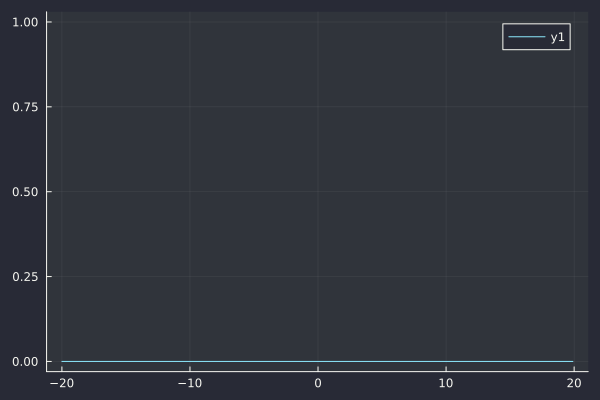

In [38]:
# Parameters
L = 40.0
dx = 0.1
x = -L/2:dx:L/2-dx
r = 3.0
M = 15
beta = 2.5
alpha = 0.0
gamma = 1.0
D = 0.01
Nh = 2 * 10^6

# Initialize viral and immune densities
viral_density = zeros(Float64, length(x))
viral_density[Int(round(length(x)/2))] = 100/dx

initial_variance = 0.1
viral_density .= 100/sqrt(2 * pi * initial_variance) .* exp.(-x.^2/2/initial_variance)
viral_density2 = zeros(Float64, length(x))
immune_density = zeros(Float64, length(x))

# Create Population instances
population = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density;stochastic=true)

# Create Network instance
migration_matrix = [0.0][:,:]
println(size(migration_matrix,1))
network = Network([population], migration_matrix)

# Create Simulation instance
dt = 0.05 # Define an appropriate time step size
duration = 80.0 # Define an appropriate simulation duration
simulation = Simulation(network, dt, duration)

# Run the simulation
@time run_simulation!(simulation)
println(length(simulation.duration_times))
plot(population.xs, population.viral_density)

In [27]:
anim = Plots.@animate for i in 2:Int(round(length(simulation.duration_times)* 3 / 8))
    # Create the primary plot
    p = plot(yscale=:log10, ylims=(1,Nh), xlims=(-L/2, L/2), xlabel="Antigenic Coordinate x", ylabel="Infected Density n(x,t)",background_color=:black)

    # Plot viral densities on the primary plot
    reg1 = simulation.trajectory[i].populations[1].viral_density .> 0
    plot!(p, population.xs[reg1], simulation.trajectory[i].populations[1].viral_density[reg1], linetype=:steppost, label=:none)

    # Create and update the secondary y-axis for fitnesses
    p3 = twinx(p)
    
    # Separate the label and the time value
    label_str = "Time:"
    time_value_str = @sprintf("%5.1f", simulation.duration_times[i])

    # Annotate the label (fixed position)
    annotate!(p3, 15.5, -0.8, text(label_str, :right, 10, :white))

    # Annotate the time value (positioned next to the label)
    annotate!(p3, 19.0, -0.8, text(time_value_str, :right, 10, :white))




    plot!(p3, ylabel="Fitness F(x)", legend=:none)
    plot!(p3, simulation.trajectory[i].populations[1].xs, simulation.trajectory[i].populations[1].fitness, ylims=(-1,1.5))
    hline!(p3, [0], linestyle=:dash, color=:white, label=:none)
    
end

mp4(anim, "pls_shorttalks_figs/sample_escape_dark.mp4", fps = 60)

┌ Info: Saved animation to c:\Users\danws\OneDrive\Documents\GitHub\viral-coev-net\julia_code\pls_shorttalks_figs\sample_escape_dark.mp4
└ @ Plots C:\Users\danws\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\danws\\OneDrive\\Documents\\GitHub\\viral-coev-net\\julia_code\\pls_shorttalks_figs\\sample_escape_dark.mp4")

In [ ]:
anim = Plots.@animate for i in 2:Int(round(length(simulation.duration_times)))
    # Create the primary plot
    p = plot(yscale=:log10, ylims=(1,Nh), xlims=(-L/2, L/2), xlabel="Antigenic Coordinate x", ylabel="Infected Density n(x,t)",background_color=:black)

    # # Plot viral densities on the primary plot
    # reg1 = simulation.trajectory[i].populations[1].viral_density .> 1
    # plot!(p, population.xs[reg1], simulation.trajectory[i].populations[1].viral_density[reg1], linetype=:steppost, label=:none, linewidth=2)
    # Plot viral densities as a histogram
    reg1 = simulation.trajectory[i].populations[1].viral_density .> 1
    temp_dens = simulation.trajectory[i].populations[1].viral_density
    temp_dens[.!reg1] .= NaN
    plot!(p, population.xs, temp_dens, linetype=:steppost, label=:none)


    # Create and update the secondary y-axis for fitnesses
    p3 = twinx(p)
    
    # Separate the label and the time value
    label_str = "Time:"
    time_value_str = @sprintf("%5.1f", simulation.duration_times[i])

    # Annotate the label (fixed position)
    annotate!(p3, 15.5, -0.8, text(label_str, :right, 10, :white))

    # Annotate the time value (positioned next to the label)
    annotate!(p3, 19.0, -0.8, text(time_value_str, :right, 10, :white))




    plot!(p3, ylabel="Fitness F(x)", legend=:none)
    plot!(p3, simulation.trajectory[i].populations[1].xs, simulation.trajectory[i].populations[1].fitness, ylims=(-1,1.5))
    hline!(p3, [0], linestyle=:dash, color=:white, label=:none)
    
end

mp4(anim, "pls_shorttalks_figs/sample_escape_dark.mp4", fps = 60)

2
2
  9.113587 seconds (1 allocation: 12.688 KiB)
1601


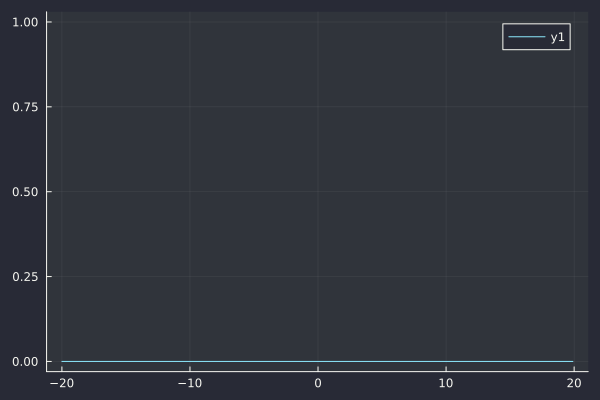

In [44]:
# Parameters
L = 40.0
dx = 0.1
x = -L/2:dx:L/2-dx
r = 3.0
M = 15
beta = 2.5
alpha = 0.0
gamma = 1.0
D = 0.01
Nh = 2 * 10^6

# Initialize viral and immune densities
viral_density = zeros(Float64, length(x))
viral_density[Int(round(length(x)/2))] = 100/dx

initial_variance = 0.1
viral_density .= 100/sqrt(2 * pi * initial_variance) .* exp.(-x.^2/2/initial_variance)

viral_density2 = zeros(Float64, length(x))
immune_density = zeros(Float64, length(x))

# Create Population instances
population = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density;stochastic=true)
population2 = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density2, immune_density; stochastic=true)

populations = [population, population2]
# populations = [Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density2, immune_density; stochastic=true) for _ = 1:10] 
println(size(populations,1))
# Create Network instance
migration_matrix = 0.3 * 1e-6 * ones(size(populations,1),size(populations,1)) # Define an appropriate migration matrix
println(size(migration_matrix,1))
network = Network(populations, migration_matrix)

# Create Simulation instance
dt = 0.05 # Define an appropriate time step size
duration = 80.0 # Define an appropriate simulation duration
simulation = Simulation(network, dt, duration)

# Run the simulation
@time run_simulation!(simulation)
println(length(simulation.duration_times))
plot(population.xs, population.viral_density)


In [26]:
# Parameters
L = 40.0
dx = 0.1
x = -L/2:dx:L/2-dx
r = 3.0
M = 15
beta = 2.5
alpha = 0.0
gamma = 1.0
D = 0.01
Nh = 2 * 10^6

# Initialize viral and immune densities
viral_density = zeros(Float64, length(x))
viral_density[Int(round(length(x)/2))] = 100/dx

# initial_variance = 0.1
# viral_density .= 100/sqrt(2 * pi * initial_variance) .* exp.(-x.^2/2/initial_variance)
viral_density2 = zeros(Float64, length(x))
immune_density = zeros(Float64, length(x))

# Create Population instances
population = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density; stochastic=true, sigma=2.0)
population2 = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density2, immune_density; stochastic=true, sigma=2.0)
populations = [population, population2]
# populations = [Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density2, immune_density; stochastic=true) for _ = 1:10] 
# println(size(populations,1))

# populations[1] = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density;stochastic=true)

# Create Network instance
migration_matrix = 1.0 * 1e-3 * ones(size(populations,1),size(populations,1)) # Define an appropriate migration matrix
println(size(migration_matrix,1))
network = Network(populations, migration_matrix)

# Create Simulation instance
dt = 0.05 # Define an appropriate time step size
duration = 80.0 # Define an appropriate simulation duration
simulation = Simulation(network, dt, duration; thin_by=1)

@time begin
    # single_step_evolve!(population,dt)
    run_simulation!(simulation)
end

println(migration_matrix)

2
  0.198653 seconds (3.20 k allocations: 10.169 MiB)
[0.001 0.001; 0.001 0.001]


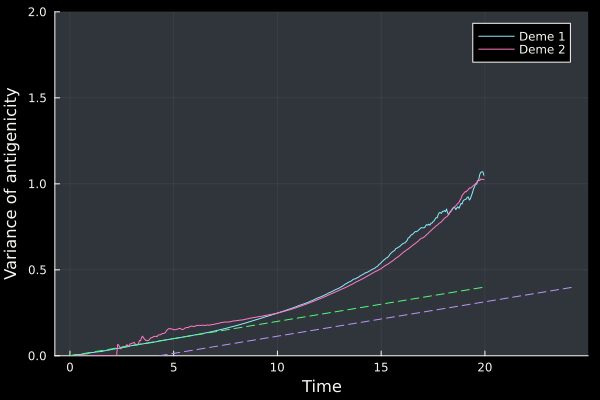

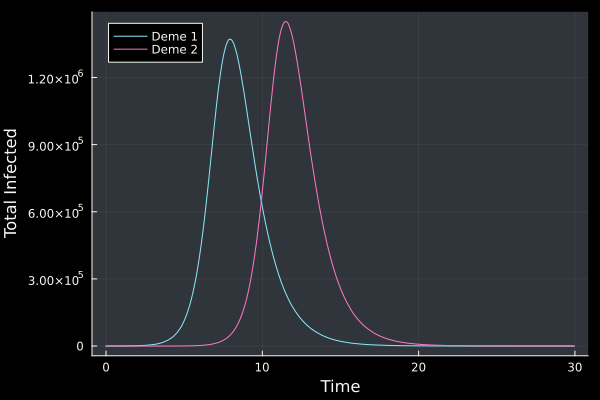

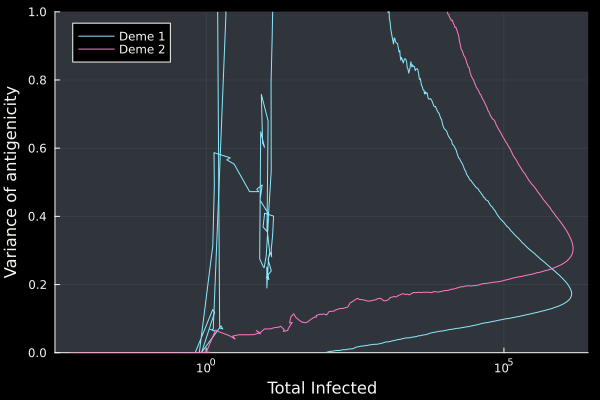

"../final_plots_viral_coev/single_trajectory.csv"

In [28]:
variances_per_deme = calculate_antigenic_variance_per_deme(simulation)
total_infected_per_deme = calculate_total_infected_per_deme(simulation)

# Number of demes
num_demes = size(total_infected_per_deme, 1)

# Plot for Variance of Antigenicity vs Time
treg = simulation.duration_times .< 20
p = plot(;xlabel="Time", ylabel="Variance of antigenicity", background_color=:black)
for deme in 1:num_demes
    plot!(p, simulation.duration_times[treg], variances_per_deme[deme, treg], label="Deme $deme")
end
plot!(p, simulation.duration_times[treg], 2 * D * simulation.duration_times[treg], linestyle=:dash, label=:none)
plot!(p, simulation.duration_times[treg] .+ 4.3, 2 * D * simulation.duration_times[treg], linestyle=:dash, label=:none)
plot!(p, ylim=(0,2))
display(p)

# Plot for Total Infected vs Time
treg = simulation.duration_times .< 30
p2 = plot(xlabel="Time", ylabel="Total Infected", background_color=:black, yscale=:linear, legend=:topleft)
# Manually setting y-axis ticks for each order of magnitude
# yticks = [10^i for i in 0:7]; plot!(p2, yticks=yticks)
for deme in 1:num_demes
    plot!(p2, simulation.duration_times[treg], total_infected_per_deme[deme, treg] .+ 10^-15, label="Deme $deme")
end
# plot!(p2, simulation.duration_times[treg] .- 4.3, total_infected_per_deme[2, treg] .+ 10^-15, label="Deme 2, shifted", xlim=(0,Inf))
display(p2)

p3 = plot(xlabel="Total Infected", ylabel="Variance of antigenicity", xscale=:log10, legend=:topleft, background_color=:black, ylims=(0,1))
for deme in 1:num_demes
    # Find the index where the total infected per deme attains its maximum for the first time
    max_index = findfirst(==(maximum(total_infected_per_deme[deme, :])), total_infected_per_deme[deme, :])

    # Create the Boolean mask
    # reg = (total_infected_per_deme[deme, :] .> 100) .& (variances_per_deme[deme, :] .> 0) .& (1:length(total_infected_per_deme[deme, :]) .< max_index)
    reg = (total_infected_per_deme[deme, :] .> 0) .& (simulation.duration_times .<  simulation.duration_times[argmax(total_infected_per_deme[deme, 1:130])])
    reg = (simulation.duration_times .< 30) .& (total_infected_per_deme[deme, :] .> 0)
    
    # Plot using the mask
    plot!(p3, total_infected_per_deme[deme, reg], variances_per_deme[deme, reg], label="Deme $deme")
end
display(p3)

savefig(p,"pls_shorttalks_figs/anitgenic_variance.png")
savefig(p2,"pls_shorttalks_figs/infected_numbers.png")
savefig(p3,"pls_shorttalks_figs/var_vs_nums.png")

reg = simulation.duration_times .< 30
plot(simulation.duration_times[reg], total_infected_per_deme[1,reg]./total_infected_per_deme[2,reg],
    yscale=:log10
)

using CSV
using DataFrames

df = DataFrame(times=simulation.duration_times, 
 total_infected_1=total_infected_per_deme[1,:],
 total_infected_2=total_infected_per_deme[2,:],
 antigenic_variance_1=variances_per_deme[1,:],
 antigenic_variance_2=variances_per_deme[2,:] )

 CSV.write("../final_plots_viral_coev/single_trajectory.csv", df)

In [ ]:
argmax(total_infected_per_deme[2,:]) * dt

In [ ]:
# anim = Plots.@animate for i in 1:length(simulation.duration_times)
#     # Create the primary plot
#     p = plot(yscale=:log10, ylims=(1,3*Nh), xlims=(-L/2, L/2), xlabel="Antigenic Coordinate x", ylabel="Infected Density n(x,t)", background_color=:black)

#     Process and plot viral densities for multiple populations
#     for j in 1:2
#         reg = simulation.trajectory[i].populations[j].viral_density .> 0
#         temp_dens = copy(simulation.trajectory[i].populations[j].viral_density)
#         temp_dens[.!reg] .= NaN
#         plot!(p, population.xs, temp_dens, linetype=:steppre, label="Deme $j")
#     end

#     # Create and update the secondary y-axis for fitnesses
#     p3 = twinx(p)

#     for j in 1:2
#         plot!(p3, simulation.trajectory[i].populations[j].xs, simulation.trajectory[i].populations[j].fitness, ylims=(-1,1.5))
#     end
#     hline!(p3, [0], linestyle=:dash, color=:white, label=:none)
# end

# # Save the animation
# mp4(anim, "pls_shorttalks_figs/twodeme_animation.mp4", fps = 60)


In [ ]:
anim = Plots.@animate for i in 2:length(simulation.duration_times)
    # Create the primary plot
    p = plot(yscale=:log10, ylims=(1,3*Nh), xlims=(-L/2, L/2), xlabel="Antigenic Coordinate x", ylabel="Infected Density n(x,t)", legend=:topright, background_color=:black)

    # Plot viral densities on the primary plot
    reg1 = simulation.trajectory[i].populations[1].viral_density .> 0
    temp_dens_1 = copy(simulation.trajectory[i].populations[1].viral_density)
    temp_dens_1[.!reg1] .= NaN
    reg2 = simulation.trajectory[i].populations[2].viral_density .> 0
    temp_dens_2 = copy(simulation.trajectory[i].populations[2].viral_density)
    temp_dens_2[.!reg2] .= NaN

    plot!(p, population.xs, temp_dens_1, linetype=:steppre, label="Deme 1")
    plot!(p, population.xs, temp_dens_2, linetype=:steppre, label="Deme 2")

    # Create and update the secondary y-axis for fitnesses
    p3 = twinx(p)
    # # Annotate time
    # label_str = "Time:"
    # time_value_str = @sprintf("%5.1f", simulation.duration_times[i])
    # annotate!(p, 15.5, -0.8, text(label_str, :right, 10, :white))
    # annotate!(p, 19.0, -0.8, text(time_value_str, :right, 10, :white))
    
    plot!(p3, ylabel="Fitness F(x)", legend=:none)
    plot!(p3, ylabel="Fitness F(x)", legend=:none)
    plot!(p3, simulation.trajectory[i].populations[1].xs, simulation.trajectory[i].populations[1].fitness, ylims=(-1,1.5))
    plot!(p3, simulation.trajectory[i].populations[1].xs, simulation.trajectory[i].populations[2].fitness, ylims=(-1,1.5))
    hline!(p3, [0], linestyle=:dash, color=:white, label=:none)
end
# Save the animation
mp4(anim, "pls_shorttalks_figs/twodeme_animation.mp4", fps = 60)

In [ ]:
# Parameters
L = 40.0
dx = 0.05
x = -L/2:dx:L/2-dx
r = 3.0
M = 15
beta = 0.0
alpha = 0.0
gamma = 0.0
D = 0.01
Nh = 3 * 10^6

# Initialize viral and immune densities
viral_density = zeros(Float64, length(x))
viral_density[Int(round(length(x)/2))] = 100/dx
viral_density2 = zeros(Float64, length(x))
immune_density = zeros(Float64, length(x))

# Create Population instances
population = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density;stochastic=false)

# Create Network instance
migration_matrix = [0.0][:,:]
println(size(migration_matrix,1))
network = Network([population], migration_matrix)

# Create Simulation instance
dt = 0.05 # Define an appropriate time step size
duration = 80.0 # Define an appropriate simulation duration
simulation = Simulation(network, dt, duration)

# Run the simulation
@time run_simulation!(simulation)
println(length(simulation.duration_times))
plot(population.xs, population.viral_density)

plot(simulation.duration_times, calculate_antigenic_variance_per_deme(simulation)[1,:])
plot!(simulation.duration_times, 2 * D * simulation.duration_times)